In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

from stats_scraping_utils import StatsScrapingUtilities
from storage import Storage
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
%matplotlib inline

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

s = Storage()
ssu = StatsScrapingUtilities(s=s)

In [3]:

# Explanatory variable
xname = 'Overall Capitalism'

# Response variable
yname = 'Gini (%)'

# Remove NaNs
columns_list = ['Country', xname, yname]
capitalism_gini_df = s.load_object('capitalism_gini_df')
df = capitalism_gini_df[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

In [4]:

df.sample(5)

,Country,Overall Capitalism,Gini (%)
137,Pakistan,48.8,66.5
144,DRC,47.6,75.5
26,Bulgaria,71.0,65.9
153,Bolivia,43.0,76.4
15,Lithuania,75.8,66.3


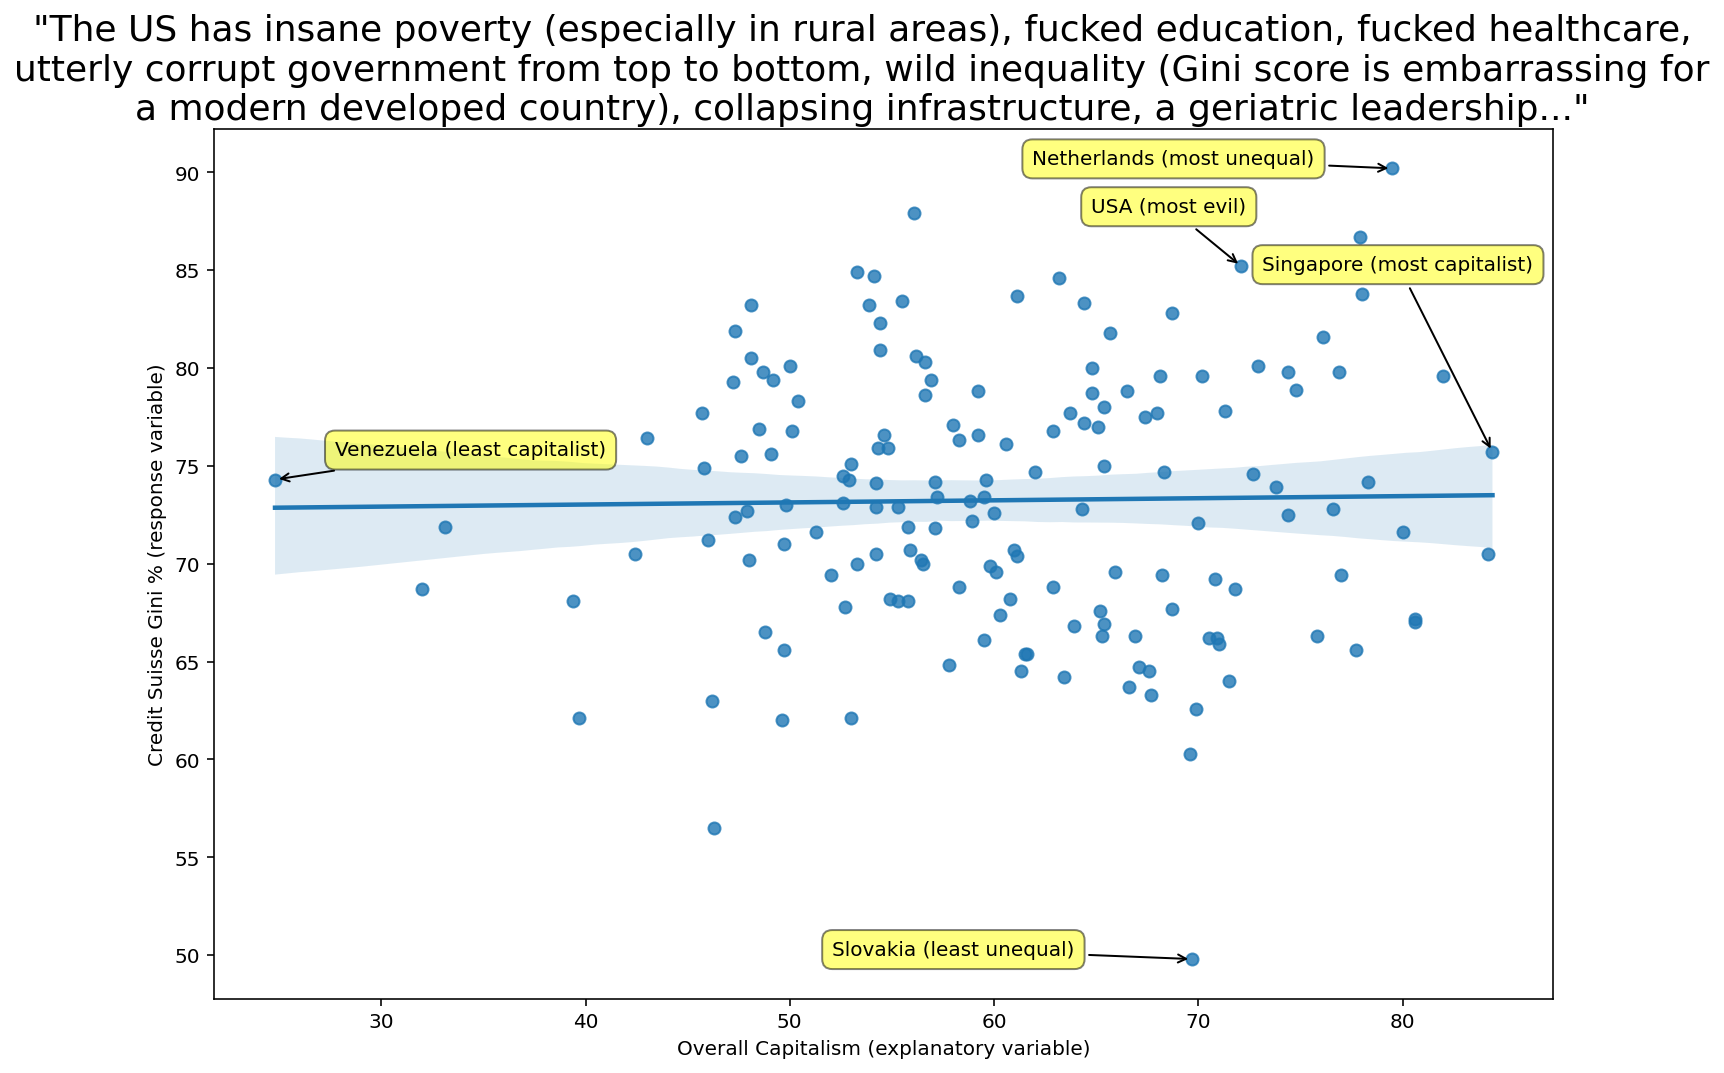

In [14]:

# First order (linear) scatterplot
fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Overall Capitalism (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'Credit Suisse Gini % (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_capitalist = xdata.min()
most_capitalist = xdata.max()
most_unequal = ydata.max()
least_unequal = ydata.min()
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_capitalist):
        annotation = plt.annotate('{} (least capitalist)'.format(label),
                                  xy=(x, y), xytext=(30, 10), **kwargs)
    elif (x == most_capitalist):
        annotation = plt.annotate('{} (most capitalist)'.format(label),
                                  xy=(x, y), xytext=(-115, 89), **kwargs)
    elif (y == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (y == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (label == 'USA'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 25), **kwargs)
title_str = '"The US has insane poverty (especially in rural areas), fucked education, '
title_str += 'fucked healthcare, utterly corrupt government from top to bottom, '
title_str += 'wild inequality (Gini score is embarrassing for a modern developed country), '
title_str += 'collapsing infrastructure, a geriatric leadership..."'
wrapped_lines = textwrap.wrap(title_str, width=len(title_str)//3+5)
title_obj = fig1_fig.suptitle('\n'.join(wrapped_lines), fontsize=18)